In [12]:
!pip install python-dotenv autogen openai pandas -q
!pip install dask[dataframe] -q

In [19]:
from autogen import AssistantAgent, UserProxyAgent, ConversableAgent
from dotenv import load_dotenv
load_dotenv()
import pandas as pd
import os

from google.colab import userdata
openai_api_key = userdata.get('OPENAI_API_KEY')
os.environ["OPENAI_API_KEY"] = openai_api_key

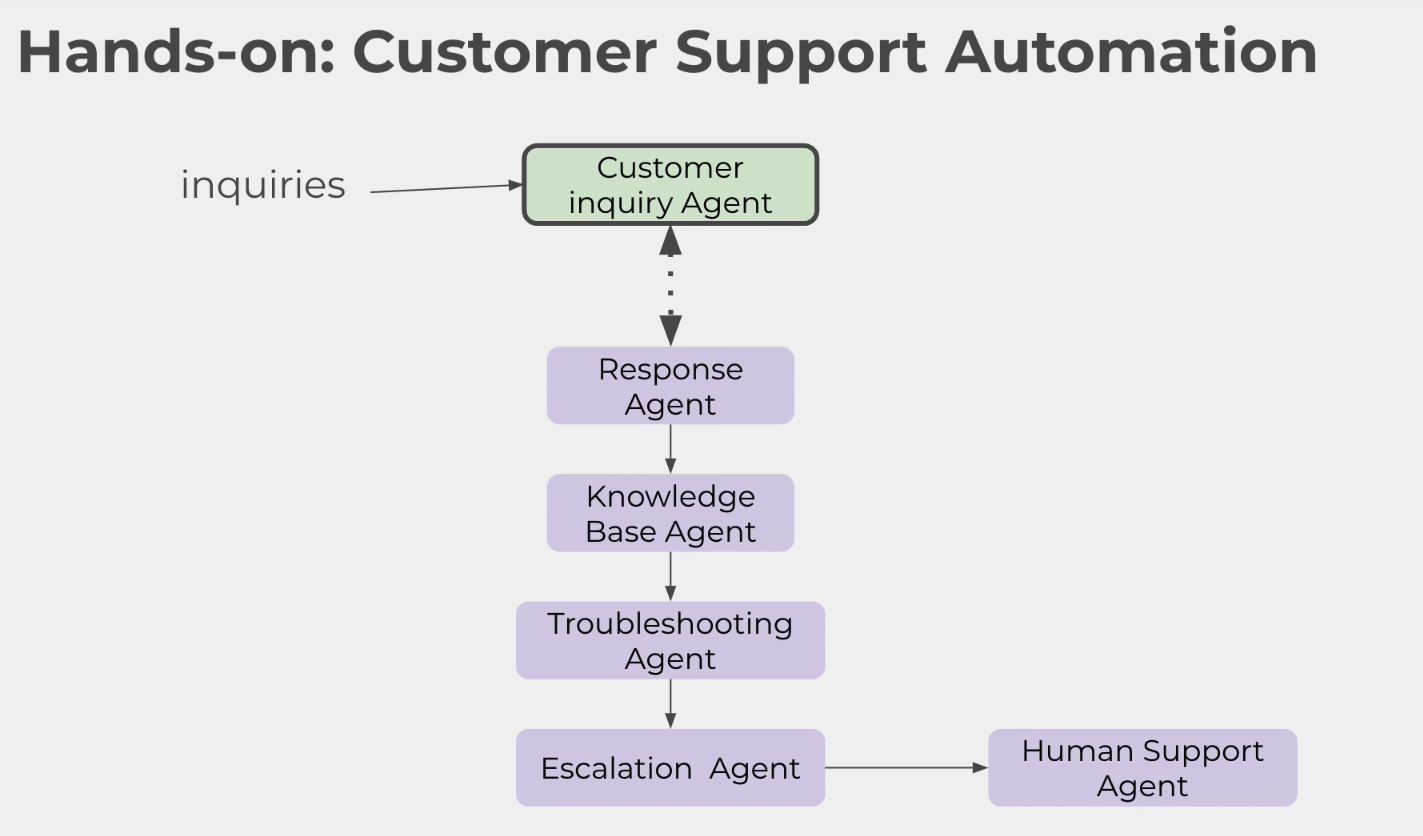

In [20]:
# Define LLM configuration
llm_config = {
    "model": "gpt-3.5-turbo",
    "temperature": 0.9,
    "api_key": openai_api_key,
}

# Define the customer inquiry agent
inquiry_agent = ConversableAgent(
    name="Inquiry_Agent",
    llm_config=llm_config,
    system_message="You handle customer inquiries and classify them.",
)

# Define the response agent
response_agent = ConversableAgent(
    name="Response_Agent",
    llm_config=llm_config,
    system_message="You provide automated responses based on the inquiry classification.",
)

# Define the knowledge base agent
knowledge_base_agent = ConversableAgent(
    name="Knowledge_Base_Agent",
    llm_config=llm_config,
    system_message="You search the company's knowledge base for solutions to customer issues.",
)

# Define the troubleshooting agent
troubleshooting_agent = ConversableAgent(
    name="Troubleshooting_Agent",
    llm_config=llm_config,
    system_message="You guide customers through troubleshooting steps to resolve their issues.",
)

# Define the feedback agent
feedback_agent = ConversableAgent(
    name="Feedback_Agent",
    llm_config=llm_config,
    system_message="You collect customer feedback on the resolution process.",
)

# Define the escalation agent
escalation_agent = ConversableAgent(
    name="Escalation_Agent",
    llm_config=llm_config,
    system_message="You identify cases that require human intervention.",
)

# Define the human support agent
human_support_agent = ConversableAgent(
    name="Human_Support_Agent",
    llm_config=llm_config,
    system_message="You connect customers with human support representatives.",
)

# Define the user proxy agent
user_proxy = UserProxyAgent(
    name="User",
    human_input_mode="NEVER",
    is_termination_msg=lambda x: x.get("content", "").find("TERMINATE") >= 0,
    code_execution_config={
        "last_n_messages": 1,
        "work_dir": "my_code",
        "use_docker": False,
    },
)

# Register nested chats with the user proxy agent
user_proxy.register_nested_chats(
    [
        {
            "recipient": response_agent,
            "message": lambda recipient, messages, sender, config: f"Classify and respond to this inquiry: {messages[-1]['content']}",
            "summary_method": "last_msg",
            "max_turns": 1,
        },
        {
            "recipient": knowledge_base_agent,
            "message": lambda recipient, messages, sender, config: f"Search for solutions to this issue: {messages[-1]['content']}",
            "summary_method": "last_msg",
            "max_turns": 1,
        },
        {
            "recipient": troubleshooting_agent,
            "message": lambda recipient, messages, sender, config: f"Guide through troubleshooting for this issue: {messages[-1]['content']}",
            "summary_method": "last_msg",
            "max_turns": 1,
        },
        {
            "recipient": feedback_agent,
            "message": lambda recipient, messages, sender, config: f"Collect feedback on this resolution process: {messages[-1]['content']}",
            "summary_method": "last_msg",
            "max_turns": 1,
        },
        {
            "recipient": escalation_agent,
            "message": lambda recipient, messages, sender, config: f"Determine if this case needs human intervention: {messages[-1]['content']}",
            "summary_method": "last_msg",
            "max_turns": 1,
        },
    ],
    trigger=inquiry_agent,
)


# Define the initial customer inquiry
initial_inquiry = (
    """My internet is not working, and I have already tried rebooting the router."""
)

# Start the nested chat
user_proxy.initiate_chat(
    recipient=inquiry_agent,
    message=initial_inquiry,
    max_turns=2,
    summary_method="last_msg",
)

User (to Inquiry_Agent):

My internet is not working, and I have already tried rebooting the router.

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
Inquiry_Agent (to User):

Issue with Internet Connection

--------------------------------------------------------------------------------

********************************************************************************
Starting a new chat....

********************************************************************************
User (to Response_Agent):

Classify and respond to this inquiry: Issue with Internet Connection

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
Response_Agent (to User):

I'm sorry to hear about the issue with your internet connection. Please try restarting your router and checking the network cables to see if that resolves the problem. If the issue persists, you may need to contact your inter

ChatResult(chat_id=None, chat_history=[{'content': 'My internet is not working, and I have already tried rebooting the router.', 'role': 'assistant', 'name': 'User'}, {'content': 'Issue with Internet Connection', 'role': 'user', 'name': 'Inquiry_Agent'}, {'content': 'This case does not require human intervention as the user has provided detailed troubleshooting steps and recommendations for resolving the issue with the internet connection. The steps provided cover a wide range of possible causes and solutions, and the guidance offered is comprehensive. The user can follow the steps outlined to address the problem effectively.', 'role': 'assistant', 'name': 'User'}, {'content': 'Classification: Self-solved', 'role': 'user', 'name': 'Inquiry_Agent'}], summary='Classification: Self-solved', cost={'usage_including_cached_inference': {'total_cost': 9.25e-05, 'gpt-3.5-turbo-0125': {'cost': 9.25e-05, 'prompt_tokens': 152, 'completion_tokens': 11, 'total_tokens': 163}}, 'usage_excluding_cached